In [3]:
def KS_1(x, N): #x is initial buffer and N is sample output
    y = x #concatenate identical copies of buffer
    while len(y) < N:
        #keep appending until required length is reached
        y = np.append(y, x)
    #trim the excess
    y = y[0:N+1]
    return y

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [5]:
plt.rcParams["figure.figsize"] = (14,4)

In [6]:
#Sampling Rate
Fs = 16000

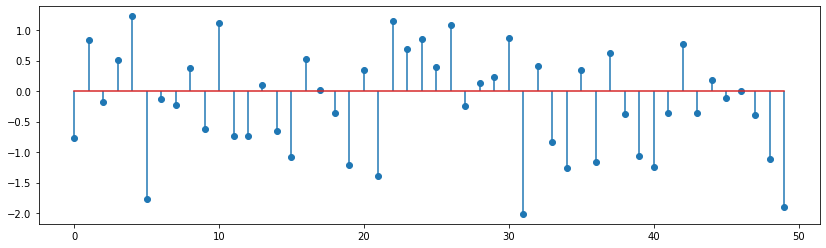

In [8]:
b = np.random.randn(50)
plt.stem(b);

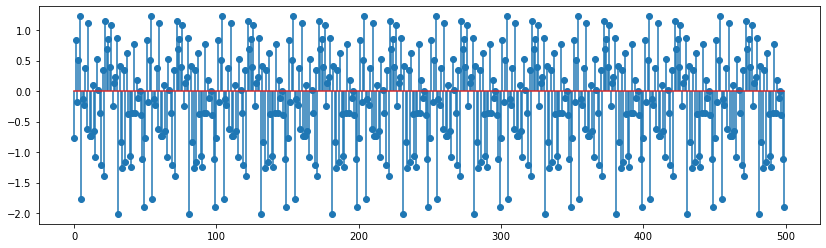

In [9]:
y = KS_1(b, Fs*2)
plt.stem(y[0:500]);

In [10]:
IPython.display.Audio(y, rate = Fs)

In [11]:
#lower octave
IPython.display.Audio(KS_1(np.random.randn(100), Fs * 2), rate = Fs)

In [19]:
#KS Algorithm as a signal processing loop
def KS_2(x, N):
    M = len(x) #length of the input
    y = np.zeros(N)
    #assuming y[n] = 0 for n < 0
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + (y[n-M] if n-M >= 0 else 0)
    return y

In [20]:
IPython.display.Audio(KS_2(np.random.rand(50), Fs * 2), rate = Fs)

In [21]:
def KS_3(x, N, alpha = 0.99):
    M = len(x)
    y = np.zeros(N)
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + alpha * (y[n-M] if n-M >= 0 else 0)
    return y

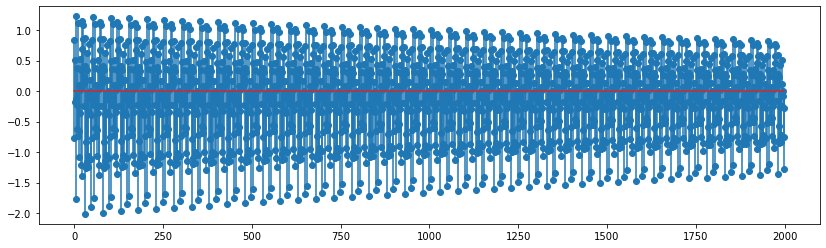

In [22]:
y = KS_3(b, Fs * 2)
plt.stem(y[0:2000]);

In [23]:
IPython.display.Audio(y, rate = Fs)

In [24]:
IPython.display.Audio(KS_3(np.random.rand(50), Fs * 2), rate=Fs)

In [25]:
IPython.display.Audio(KS_3(np.random.rand(10), Fs * 2), rate=Fs)

In [28]:
def KS(x, N, alpha = 0.99):
    #adjusting alpha so that all notes have a decay
    REF_LEN = 50
    M = len(x)
    a = alpha ** (float(M)/REF_LEN)
    y = np.zeros(N)
    for n in range(0, N):
        y[n] = (x[n] if n < M else 0) + a * (y[n-M] if n-M >= 0 else 0)
    return y

In [29]:
IPython.display.Audio(KS(np.random.rand(50), Fs * 2), rate=Fs)

In [30]:
IPython.display.Audio(KS(np.random.rand(10), Fs * 2), rate=Fs)

In [34]:
def freq(note):
    # general purpose function to convert a note  in standard notation 
    #  to corresponding frequency
    if len(note) < 2 or len(note) > 3 or \
        note[0] < 'A' or note[0] > 'G':
        return 0
    if len(note) == 3:
        if note[1] == 'b':
            acc = -1
        elif note[1] == '#':
            acc = 1
        else:
            return 0
        octave = int(note[2])
    else:
        acc = 0
        octave = int(note[1])
    SEMITONES = {'A': 0, 'B': 2, 'C': -9, 'D': -7, 'E': -5, 'F': -4, 'G': -2}
    n = 12 * (octave - 4) + SEMITONES[note[0]] + acc
    f = 440 * (2 ** (float(n) / 12.0))
    #print note, f
    return f


def ks_chord(chord, N, alpha):
    y = np.zeros(N)
    # the chord is a dictionary: pitch => gain
    for note, gain in chord.items():
        # create an initial random-filled KS buffer the note
        x = np.random.randn(int(np.round(float(Fs) / freq(note))))
        y = y + gain * KS(x, N, alpha)
    return y

In [35]:
# A Hard Day's Night's chord
hdn_chord = {
    'D2' : 2.2, 
    'D3' : 3.0, 
    'F3' : 1.0, 
    'G3' : 3.2, 
    'F4' : 1.0, 
    'A4' : 1.0, 
    'C5' : 1.0, 
    'G5' : 3.5,
}
    
IPython.display.Audio(ks_chord(hdn_chord, Fs * 4, 0.995), rate=Fs)